In [374]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv(r"./clean_data_lmtd_stmd.csv", low_memory=False)


In [3]:
df

,date_created,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,...,month_year,parsed_hashtags,includes_abortion,locations,clean_location,clean_text,more_clean_text,blob_sentiment,clean_hashtags,lemd_stmd
0,7/30/21 23:53,Sociafy is an influencer-based content discove...,9/30/11 5:59,36219,181,930,False,7/30/21 23:53,O‚Äö√Ñ√¥Reilly predicts THIS is What DOOMS Bid...,"['politics', 'videos']",...,21-Jul,"['politics', 'videos']",no,united states,USA,OReilly predicts THIS is What DOOMS Bidens ree...,OReilly predicts DOOMS Bidens reelection chance,neutral,politics videos,oreilli predict doom biden reelect chanc
1,7/30/21 23:51,Home of Crypto Communities. $ATMOS \n\nhttps:/...,2/9/17 23:15,2426,1104,8173,False,7/30/21 23:51,Corruption in Politics\n#blog #politics \nhttp...,"['blog', 'politics']",...,21-Jul,"['blog', 'politics']",no,united states,USA,Corruption in Politics,Corruption Politics,neutral,blog politics,corrupt polit
2,7/30/21 23:50,"Developer, Artist, Investor, Entrepreneur, Eff...",7/9/09 4:07,495,2681,6930,False,7/30/21 23:50,90% of US drone strikes kill civilians. An ope...,"['politics', 'justice', 'war']",...,21-Jul,"['politics', 'justice', 'war']",no,california,CA,90 of US drone strikes kill civilians An opera...,90 US drone strikes kill civilians operator le...,neutral,politics justice war,90 us drone strike kill civilian oper leak evi...
3,7/30/21 23:49,"Comprehensive, up-to-date news coverage, aggre...",7/24/17 7:39,340,114,1,False,7/30/21 23:49,"100,000-Year-Old Fossil of Largest-Ever Vampir...","['news', 'covid', 'usa', 'canada', 'uk', 'inst...",...,21-Jul,"['news', 'covid', 'usa', 'canada', 'uk', 'inst...",no,united states,USA,100000YearOld Fossil of LargestEver Vampire Ba...,100000YearOld Fossil LargestEver Vampire Bat F...,neutral,news covid usa canada uk instagram love corona...,100000yearold fossil largestev vampir bat found
4,7/30/21 23:49,Gay Progressive Patriot. #NYC's the greatest c...,6/20/08 18:32,6451,2806,4257,False,7/30/21 23:49,Via @RawStory: 'People will die': Congress bla...,"['politics', 'trump', 'corruption']",...,21-Jul,"['politics', 'trump', 'corruption']",no,new york,NEW YORK,Via People will die Congress blasted for faili...,People die Congress blasted failing eviction m...,negative,politics trump corruption,peopl die congress blast fail evict moratorium...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72797,8/15/22 22:06,Gay Progressive Patriot. #NYC's the greatest c...,6/20/08 18:32,6343,2786,4226,False,8/15/22 22:06,Via @RawStory: Trump doesn't think Merrick Gar...,"['politics', 'trump', 'corruption']",...,22-Aug,"['politics', 'trump', 'corruption']",no,new york,NEW YORK,Via Trump doesnt think Merrick Garland will ch...,Trump doesnt think Merrick Garland charge aide...,negative,politics trump corruption,trump doesnt think merrick garland charg aid f...
72798,8/15/22 22:01,Runs @GeekAlabama; #Aspie proud! #ASD. I‚Äö√Ñ...,4/27/09 20:24,4668,5122,112650,False,8/15/22 22:01,"It's Okay To Be Woke: Congrats to Alabama, whe...","['video', 'politics', 'liberal', 'liberallogic...",...,22-Aug,"['video', 'politics', 'liberal', 'liberallogic...",no,alabama,AL,Its Okay To Be Woke Congrats to Alabama where ...,Okay Woke Congrats Alabama Republicans support...,neutral,video politics liberal liberallogic woke woken...,okay woke congrat alabama republican support e...
72799,8/15/22 22:01,Board Certified | CEO @NeighborhoodPsy Writer ...,3/21/08 4:29,3397,2163,3541,False,8/15/22 22:01,"What constitutes ""Everyday Evil""?\n\nPsycholog...","['psychology', 'evil', 'politics', 'psychiatry...",...,22-Aug,"['psychology', 'evil', 'politics', 'psychiatry...",no,new york,NEW YORK,What constitutes Everyday Evil Psychologists p...,constitutes Everyday Evil Psychologists presen...,negative,psychology evil politics psychiatry law humani...,constitut everyday evil psychologist present c...
72800,8/15/22 21:59,Israel Cruz i

In [369]:
df.iloc[0]["text"]

'O‚Äö√Ñ√¥Reilly predicts THIS is What DOOMS Biden‚Äö√Ñ√¥s reelection chance - via: @glennbeck https://t.co/VHWiJWEK48 #politics #videos https://t.co/A1KLPNWfEU'

In [4]:
df.isnull().sum()

date_created            0
user_description     1118
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags                0
is_retweet              0
month_year              0
parsed_hashtags         0
includes_abortion       0
locations               0
clean_location          0
clean_text              9
more_clean_text       150
blob_sentiment          0
clean_hashtags          1
lemd_stmd             150
dtype: int64

In [5]:
df.dropna(subset=["clean_hashtags"], inplace=True)

In [6]:
df.dropna(subset=["lemd_stmd"], inplace=True)

In [7]:
df.isnull().sum()

date_created            0
user_description     1115
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags                0
is_retweet              0
month_year              0
parsed_hashtags         0
includes_abortion       0
locations               0
clean_location          0
clean_text              0
more_clean_text         0
blob_sentiment          0
clean_hashtags          0
lemd_stmd               0
dtype: int64

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
vector_matrix = count_vectorizer.fit_transform(df["lemd_stmd"])
vector_matrix


<72651x35742 sparse matrix of type '<class 'numpy.int64'>'
	with 707185 stored elements in Compressed Sparse Row format>

In [9]:
tokens = count_vectorizer.get_feature_names_out()
tokens

array(['000', '00001', '0000489', ..., 'zvichidaro', 'zz', 'zzz'],
      dtype=object)

In [10]:
vector_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
def create_dataframe(matrix, tokens, df):
    doc_names = df["locations"]
    data = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return data


In [12]:
data = create_dataframe(vector_matrix.toarray(),tokens, df)

In [59]:
nltk.download('words')
import nltk

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Chowd\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
data.loc['new york', 'trump'].sum()

In [371]:
top_20_pairs_ny = data.loc['new york'].sum().sort_values(ascending=False).nlargest(150)


<function matplotlib.pyplot.show(close=None, block=None)>

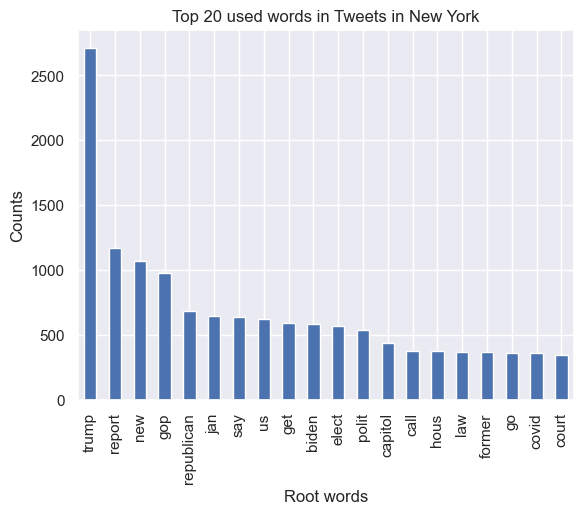

In [372]:
top_20_pairs_ny[:20].plot(kind="bar")
plt.title("Top 20 used words in Tweets in New York")
plt.xlabel("Root words")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

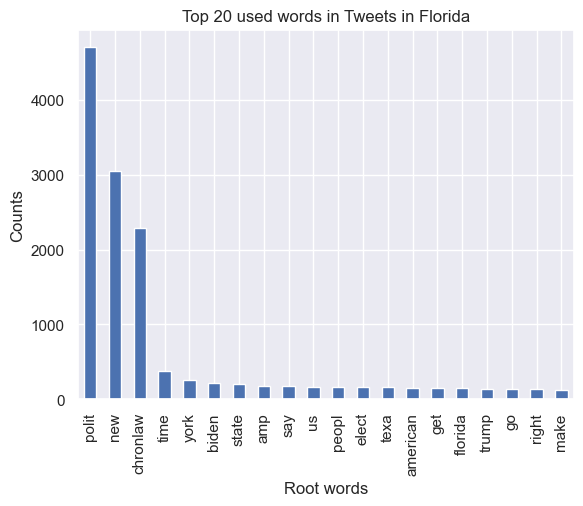

In [190]:
top_20_pairs_fl = data.loc['texas'].sum().sort_values(ascending=False).nlargest(150)
top_20_pairs_fl[:20].plot(kind="bar")
plt.title("Top 20 used words in Tweets in Florida")
plt.xlabel("Root words")
plt.ylabel("Counts")
plt.show

In [31]:
top_20_pairs_ca = data.loc['california'].sum().sort_values(ascending=False).nlargest(150)

<function matplotlib.pyplot.show(close=None, block=None)>

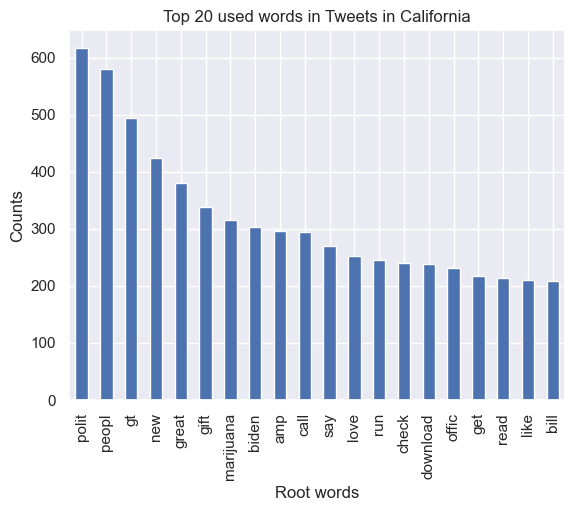

In [75]:
top_20_pairs_ca[:20].plot(kind="bar")
plt.title("Top 20 used words in Tweets in California")
plt.xlabel("Root words")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

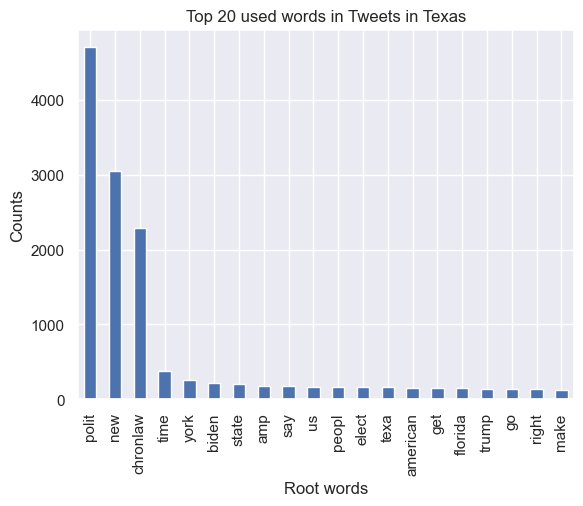

In [74]:
top_20_pairs_tx = data.loc['texas'].sum().sort_values(ascending=False).nlargest(150)
top_20_pairs_tx[:20].plot(kind="bar")
plt.title("Top 20 used words in Tweets in Texas")
plt.xlabel("Root words")
plt.ylabel("Counts")
plt.show

In [37]:
top_20_pairs_tx.dtype

dtype('int64')

In [127]:
for i in top_20_pairs_tx.index[:20]:
    if i in top_20_pairs_ca[:20]:
        if i in top_20_pairs_ny[:20]:
            print(i)

polit
new
biden
say
get


<function matplotlib.pyplot.show(close=None, block=None)>

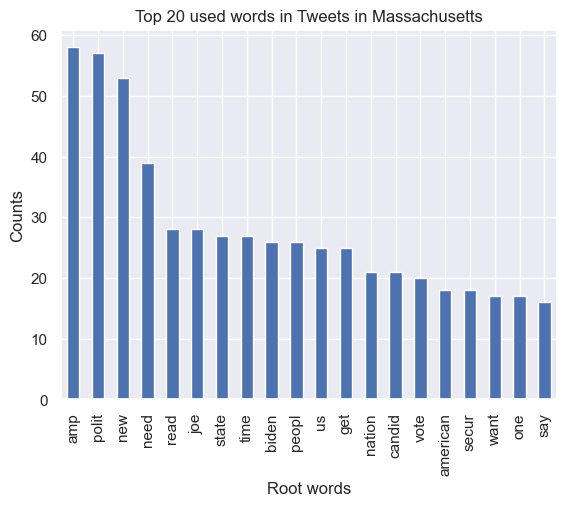

In [67]:
top_20_pairs_ma = data.loc['massachusetts'].sum().sort_values(ascending=False).nlargest(150)
top_20_pairs_ma[:20].plot(kind="bar")
plt.title("Top 20 used words in Tweets in Massachusetts")
plt.xlabel("Root words")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

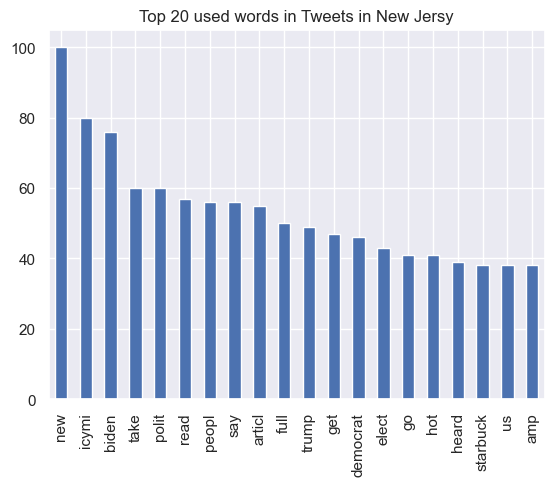

In [64]:
top_20_pairs_nj = data.loc['new jersey'].sum().sort_values(ascending=False).nlargest(150)
top_20_pairs_nj[:20].plot(kind="bar")
plt.title("Top 20 used words in Tweets in New Jersy")
plt.show

In [128]:
common_ma_nj = []
for i in top_20_pairs_ma.index[:20]:
    if i in top_20_pairs_nj[:20]:
        common_ma_nj.append(i)
        

In [129]:
len(common_ma_nj)

9

In [130]:
common_ma_nj

['amp', 'polit', 'new', 'read', 'biden', 'peopl', 'us', 'get', 'say']

<function matplotlib.pyplot.show(close=None, block=None)>

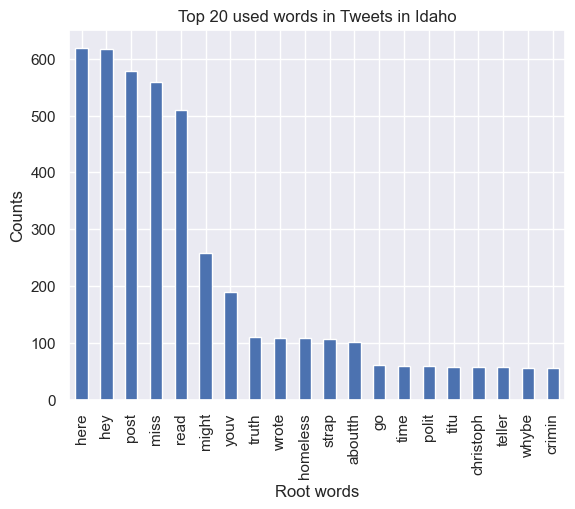

In [78]:
top_20_pairs_id = data.loc['idaho'].sum().sort_values(ascending=False).nlargest(150)
top_20_pairs_id[:20].plot(kind="bar")
plt.title("Top 20 used words in Tweets in Idaho")
plt.xlabel("Root words")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

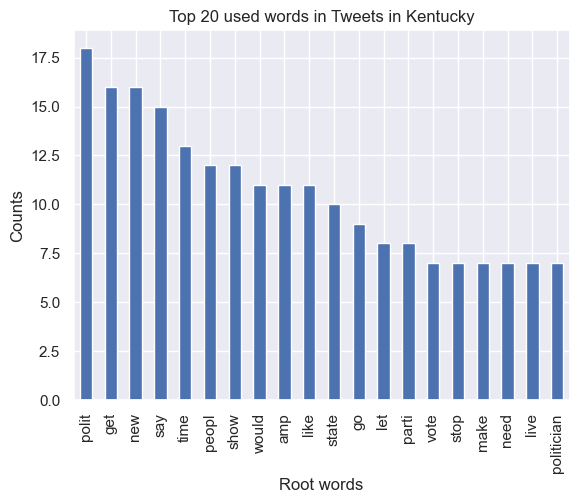

In [133]:
top_20_pairs_ky = data.loc['kentucky'].sum().sort_values(ascending=False).nlargest(150)
top_20_pairs_ky[:20].plot(kind="bar")
plt.title("Top 20 used words in Tweets in Kentucky")
plt.xlabel("Root words")
plt.ylabel("Counts")
plt.show

In [131]:
common_id_nj = []
for i in top_20_pairs_id.index[:20]:
    if i in top_20_pairs_nj[:20]:
        common_id_nj.append(i)

In [132]:
common_id_nj

['polit', 'get', 'new', 'say', 'peopl', 'amp', 'go']

In [91]:
len(common_id_nj)

19

<function matplotlib.pyplot.show(close=None, block=None)>

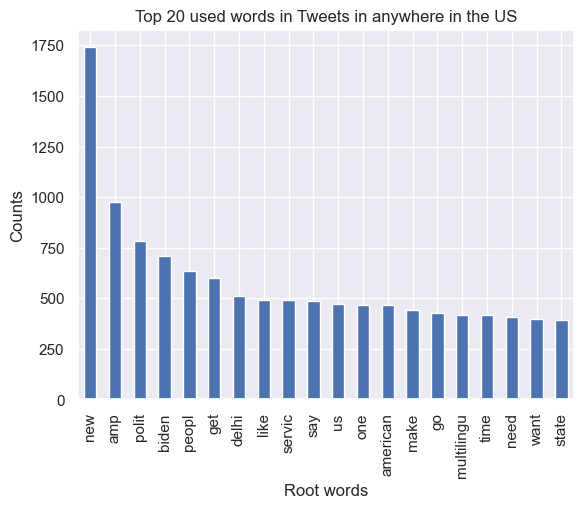

In [93]:
top_20_pairs_usa = data.loc['united states'].sum().sort_values(ascending=False).nlargest(150)
top_20_pairs_usa[:20].plot(kind="bar")
plt.title("Top 20 used words in Tweets in anywhere in the US")
plt.xlabel("Root words")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

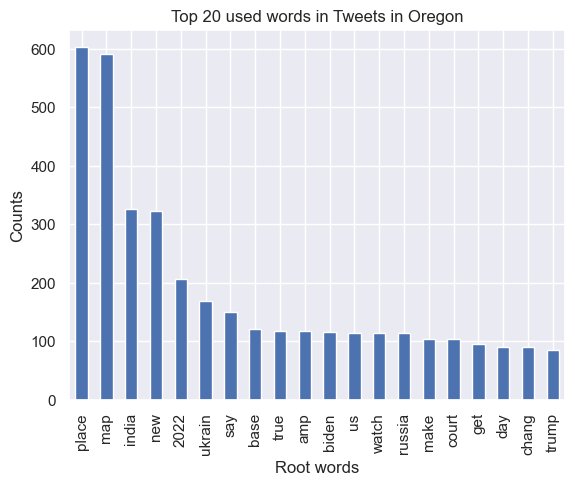

In [191]:
top_20_pairs_or = data.loc['oregon'].sum().sort_values(ascending=False).nlargest(150)
top_20_pairs_or[:20].plot(kind="bar")
plt.title("Top 20 used words in Tweets in Oregon")
plt.xlabel("Root words")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

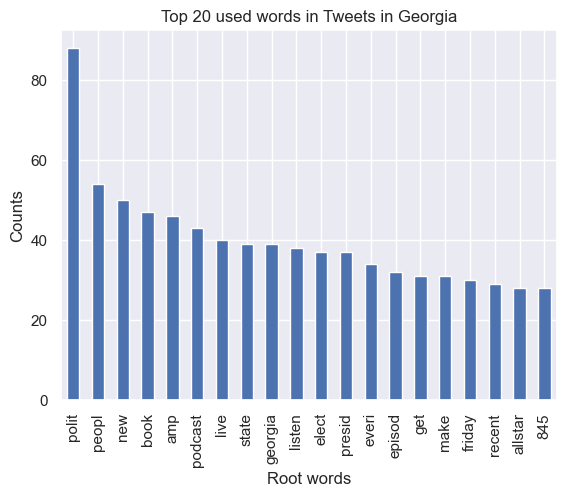

In [165]:
top_20_pairs_ga = data.loc['georgia'].sum().sort_values(ascending=False).nlargest(150)
top_20_pairs_ga[:20].plot(kind="bar")
plt.title("Top 20 used words in Tweets in Georgia")
plt.xlabel("Root words")
plt.ylabel("Counts")
plt.show

In [ ]:
top_20_words_ny["maga"]

In [156]:
top_20_pairs_ny["maga"]

248

In [158]:
# top_20_pairs_tx["maga"]

In [159]:
top_20_pairs_ny["ukrain"]

294

In [160]:
top_20_pairs_tx["ukrain"]

89

In [161]:
top_20_pairs_ny["covid"]

355

In [162]:
top_20_pairs_tx["covid"]

75

In [194]:
print(f"Kentucky : {top_20_pairs_ky['covid']}")
# print(f"Idaho : {top_20_pairs_ga['covid']}")
print(f"Texas : {top_20_pairs_tx['covid']}")
print(f"Florida : {top_20_pairs_fl['covid']}")
# print(f"Georgia : {top_20_pairs_ga['covid']}")
print(f"California : {top_20_pairs_ca['covid']}")
print(f"New York : {top_20_pairs_ny['covid']}")
# print(f"New Jersey : {top_20_pairs_nj['covid']}")
print(f"Oregon : {top_20_pairs_or['covid']}")




Kentucky : 3
Texas : 75
Florida : 75
California : 58
New York : 355
Oregon : 83


In [201]:
print("Ukrain appeared in:")

# print(f"Kentucky : {((top_20_pairs_ky['ukrain'])/182)*100:.2f}%")
print(f"Idaho : {((top_20_pairs_ga['ukrain'])/680)*100:.2f}%")
print(f"Texas : {((top_20_pairs_tx['ukrain'])/4702)*100:.2f}%")
print(f"Georgia : {((top_20_pairs_ga['ukrain'])/706)*100:.2f}%")
print(f"Florida : {((top_20_pairs_fl['ukrain'])/6207)*100:.2f}%")
print(f"California : {((top_20_pairs_ca['ukrain'])/5274)*100:.2f}%")
print(f"New York : {((top_20_pairs_ny['ukrain'])/14180)*100:.2f}%")
# print(f"New Jersey : {((top_20_pairs_nj['ukrain'])/888)*100:.2f}%")
print(f"Oregon : {((top_20_pairs_or['ukrain'])/3425)*100:.2f}%")

Ukrain appeared in:
Idaho : 1.91%
Texas : 1.89%
Georgia : 1.84%
Florida : 1.43%
California : 1.25%
New York : 2.07%
Oregon : 4.91%


In [205]:
print("covid appeared in:")

print(f"Kentucky : {((top_20_pairs_ky['covid'])/182)*100:.2f}%")
# print(f"Idaho : {((top_20_pairs_ga['covid'])/680)*100:.2f}%")
print(f"Texas : {((top_20_pairs_tx['covid'])/4702)*100:.2f}%")
# print(f"Georgia : {((top_20_pairs_ga['covid'])/706)*100:.2f}%")
print(f"Florida : {((top_20_pairs_fl['covid'])/6207)*100:.2f}%")
print(f"California : {((top_20_pairs_ca['covid'])/5274)*100:.2f}%")
print(f"New York : {((top_20_pairs_ny['covid'])/14180)*100:.2f}%")
# print(f"New Jersey : {((top_20_pairs_nj['covid'])/888)*100:.2f}%")
print(f"Oregon : {((top_20_pairs_or['covid'])/3425)*100:.2f}%")

covid appeared in:
Kentucky : 1.65%
Texas : 1.60%
Florida : 1.21%
California : 1.10%
New York : 2.50%
Oregon : 2.42%


In [214]:
print("race appeared in:")

# print(f"Kentucky : {((top_20_pairs_ky['race'])/182)*100:.2f}%")
print(f"Idaho : {((top_20_pairs_ga['race'])/680)*100:.2f}%")
print(f"Texas : {((top_20_pairs_tx['race'])/4702)*100:.2f}%")
print(f"Georgia : {((top_20_pairs_ga['race'])/706)*100:.2f}%")
print(f"Florida : {((top_20_pairs_fl['race'])/6207)*100:.2f}%")
# print(f"California : {((top_20_pairs_ca['race'])/5274)*100:.2f}%")
# print(f"New York : {((top_20_pairs_ny['race'])/14180)*100:.2f}%")
print(f"New Jersey : {((top_20_pairs_nj['race'])/888)*100:.2f}%")
# print(f"Oregon : {((top_20_pairs_or['race'])/3425)*100:.2f}%")

race appeared in:
Idaho : 1.62%
Texas : 2.08%
Georgia : 1.56%
Florida : 1.58%
New Jersey : 1.69%


In [217]:
print("trump appeared in:")

# print(f"Kentucky : {((top_20_pairs_ky['trump'])/182)*100:.2f}%")
print(f"Idaho      : {((top_20_pairs_ga['trump'])/680)*100:.2f}%")
print(f"Texas      : {((top_20_pairs_tx['trump'])/4702)*100:.2f}%")
print(f"Georgia    : {((top_20_pairs_ga['trump'])/706)*100:.2f}%")
print(f"Florida    : {((top_20_pairs_fl['trump'])/6207)*100:.2f}%")
print(f"California : {((top_20_pairs_ca['trump'])/5274)*100:.2f}%")
print(f"New York   : {((top_20_pairs_ny['trump'])/14180)*100:.2f}%")
print(f"New Jersey : {((top_20_pairs_nj['trump'])/888)*100:.2f}%")
print(f"Oregon     : {((top_20_pairs_or['trump'])/3425)*100:.2f}%")

trump appeared in:
Idaho      : 2.21%
Texas      : 3.08%
Georgia    : 2.12%
Florida    : 2.34%
California : 3.15%
New York   : 19.15%
New Jersey : 5.52%
Oregon     : 2.48%


In [220]:
print("biden appeared in:")

print(f"Kentucky   : {((top_20_pairs_ky['biden'])/182)*100:.2f}%")
print(f"Idaho      : {((top_20_pairs_ga['biden'])/680)*100:.2f}%")
print(f"Texas      : {((top_20_pairs_tx['biden'])/4702)*100:.2f}%")
print(f"Georgia    : {((top_20_pairs_ga['biden'])/706)*100:.2f}%")
print(f"Florida    : {((top_20_pairs_fl['biden'])/6207)*100:.2f}%")
print(f"California : {((top_20_pairs_ca['biden'])/5274)*100:.2f}%")
print(f"New York   : {((top_20_pairs_ny['biden'])/14180)*100:.2f}%")
print(f"New Jersey : {((top_20_pairs_nj['biden'])/888)*100:.2f}%")
print(f"Oregon     : {((top_20_pairs_or['biden'])/3425)*100:.2f}%")

biden appeared in:
Kentucky   : 1.65%
Idaho      : 3.68%
Texas      : 4.64%
Georgia    : 3.54%
Florida    : 3.51%
California : 5.76%
New York   : 4.09%
New Jersey : 8.56%
Oregon     : 3.36%


In [263]:
print("abort appeared in:")

print(f"Kentucky   : {((top_20_pairs_ky['abort'])/182)*100:.2f}%")
print(f"Idaho      : {((top_20_pairs_ga['abory'])/680)*100:.2f}%")
print(f"Texas      : {((top_20_pairs_tx['abort'])/4702)*100:.2f}%")
print(f"Georgia    : {((top_20_pairs_ga['abort'])/706)*100:.2f}%")
print(f"Florida    : {((top_20_pairs_fl['abort'])/6207)*100:.2f}%")
print(f"California : {((top_20_pairs_ca['abort'])/5274)*100:.2f}%")
print(f"New York   : {((top_20_pairs_ny['abort'])/14180)*100:.2f}%")
print(f"New Jersey : {((top_20_pairs_nj['abort'])/888)*100:.2f}%")
print(f"Oregon     : {((top_20_pairs_or['abort'])/3425)*100:.2f}%")

abort appeared in:


In [293]:
print("marijuana appeared in:")

# print(f"Kentucky   : {((top_20_pairs_ky['marijuana'])/182)*100:.2f}%")
# print(f"Idaho      : {((top_20_pairs_ga['marijuana'])/680)*100:.2f}%")
# print(f"Texas      : {((top_20_pairs_tx['marijuana'])/4702)*100:.2f}%")
# print(f"Georgia    : {((top_20_pairs_ga['marijuana'])/706)*100:.2f}%")
# print(f"Florida    : {((top_20_pairs_fl['marijuana'])/6207)*100:.2f}%")
print(f"California : {((top_20_pairs_ca['marijuana'])/5274)*100:.2f}%")
# print(f"New York   : {((top_20_pairs_ny['marijuana'])/14180)*100:.2f}%")
# print(f"New Jersey : {((top_20_pairs_nj['marijuana'])/888)*100:.2f}%")
# print(f"Oregon     : {((top_20_pairs_or['marijuana'])/3425)*100:.2f}%")

marijuana appeared in:
California : 5.99%


In [304]:
print("god appeared in:")

print(f"Kentucky   : {((top_20_pairs_ky['god'])/182)*100:.2f}%")
# print(f"Idaho      : {((top_20_pairs_ga['god'])/680)*100:.2f}%")
# print(f"Texas      : {((top_20_pairs_tx['god'])/4702)*100:.2f}%")
# print(f"Georgia    : {((top_20_pairs_ga['god'])/706)*100:.2f}%")
# print(f"Florida    : {((top_20_pairs_fl['god'])/6207)*100:.2f}%")
# print(f"California : {((top_20_pairs_ca['god'])/5274)*100:.2f}%")
# print(f"New York   : {((top_20_pairs_ny['god'])/14180)*100:.2f}%")
# print(f"New Jersey : {((top_20_pairs_nj['god'])/888)*100:.2f}%")
# print(f"Oregon     : {((top_20_pairs_or['god'])/3425)*100:.2f}%")

god appeared in:
Kentucky   : 1.65%


In [322]:
for i in data.columns:
    if "abort" in i:
        print(i)

abort
abortionlov
abortionrel
abortionseek
abortiontaint
abortionth
abortionwhat
ampabort
antiabort
antiabortionist
chakraborti
ongunsandabortionfurth
proabort


In [337]:
abortion_mask = data[["abort", "abortionlov", "abortionrel", "abortionseek", "abortiontaint", "abortionth", "abortionth", "abortionwhat",
     "ampabort", "antiabort", "antiabortionist", "proabort"]].notnull

In [350]:
abortion_by_state = data.groupby(data.index)[["abort", "abortionlov", "abortionrel", "abortionseek", "abortiontaint", "abortionth", "abortionth", "abortionwhat",
     "ampabort", "antiabort", "antiabortionist", "proabort"]].sum().sort_values(by=  "abort", ascending=False)


In [352]:
abortion_by_state

,abort,abortionlov,abortionrel,abortionseek,abortiontaint,abortionth,abortionth,abortionwhat,ampabort,antiabort,antiabortionist,proabort
locations,,,,,,,,,,,,
new york,159,0,0,1,0,0,0,0,0,16,1,0
washington,117,0,0,0,0,0,0,1,0,7,0,0
united states,35,0,0,0,0,0,0,0,0,1,0,2
california,31,0,0,0,0,1,1,0,0,1,0,1
pennsylvania,27,0,0,0,0,0,0,0,0,5,0,0
texas,23,0,2,0,0,0,0,0,0,4,0,0
florida,11,1,0,0,1,0,0,0,0,0,1,1
illinois,10,0,0,0,0,0,0,0,0,0,0,0
arizona,9,0,0,0,0,0,0,0,0,0,0,0


In [363]:
sum_abortion = []
for index, row in abortion_by_state.iterrows():
       sum_abortion.append(row.sum())

In [365]:
abortion_by_state["sum_abortion"] = sum_abortion

In [367]:
add_up = [row.sum() for index, row in abortion_by_state.iterrows() ]